## Mini Projeto - Data Science Academy

#### André Campos da Silva
#### 08 de Janeiro, 2021

### Projeto - Prevendo Customer Churn em Operadoras de Telecom


Construir um modelo que permita prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente, se um cliente pode ou não cancelar seu plano e qual a probabilidade de isso ocorrer.

Dataset: Disponibilizaod pela DSA e está na pasta do projeto. 

Descrição dos dados:

Conjunto de dados com as variáveis preditoras onde a coluna "churn" é a variável a ser prevista. Valor 'no' para quem não continuou o plano e 'yes' para quem mateve. 


## Carregando pacotes 

In [65]:
# Pacotes usados no projeto
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category = ConvergenceWarning)
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,chi2,RFE,mutual_info_classif,f_classif
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,VotingClassifier,RandomForestClassifier,ExtraTreesClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier



## Carregando os Dados 

In [88]:
# Carregos os dados de treino e teste. 
df_train = pd.read_csv('Dados/projeto4_telecom_treino.csv',index_col=0) 
df_test = pd.read_csv('Dados/projeto4_telecom_teste.csv',index_col=0)

Descrição dos dados 

1. "state", string. Código de 2 letras do estado de residência do cliente nos EUA
2. "account_length", numérico. Número de meses que o cliente está com o provedor de telecomunicações atual
3. "area_code", string = "area_code_AAA" onde AAA = código de área de 3 dígitos.
4. "international_plan", (sim / não). O cliente possui plano internacional.
5. "voice_mail_plan", (sim / não). O cliente possui plano de correio de voz.
6. "number_vmail_messages", numérico. Número de mensagens de correio de voz.
7. "total_day_minutes", numérico. Total de minutos de chamadas diárias.
8. "total_day_calls", numérico. Total de chamadas diárias.
9. "total_day_charge", numérico. Cobrança total das chamadas diurnas.
10. "total_eve_minutes", numérico. Total de minutos de ligações tarde/noite.
11. "total_eve_calls", numérico. Número total de chamadas tarde/noite.
12. "total_eve_charge", numérico. Cobrança total das chamadas tarde/noite.
13. "total_night_minutes", numérico. Total de minutos de chamadas noturnas.
14. "total_night_calls", numérico. Número total de chamadas noturnas.
15. "total_night_charge	", numérico. Cobrança total das chamadas noturnas.
16. "total_intl_minutes", numérico. Total de minutos de chamadas internacionais.
17. "total_intl_calls", numérico. Número total de chamadas internacionais.
18. "total_intl_charge", numérico. Custo total de chamadas internacionais
19. "number_customer_service_calls", numérico. Número de ligações para atendimento ao cliente
20. "churn", (sim / não). Cliente churn - variável alvo.

In [3]:
df_train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [4]:
df_test.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
2,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
4,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
5,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


## Análise Exploratória de Dados

In [5]:
# Dimensões dos dados de treino e teste.

print(f' Shape dados Treino: {df_train.shape} \n Shape dados Test: {df_test.shape}')

 Shape dados Treino: (3333, 20) 
 Shape dados Test: (1667, 20)


In [6]:
# Tipo dos dados das variáveis
df_train.dtypes.value_counts()


float64    8
int64      7
object     5
dtype: int64

In [7]:
# Sumário estatístico das variáveis
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
# Verificar se existe valores nulos nos dados de treino e teste.
print(f' Dados treino: {df_train.isnull().values.any()} \n Dados test: {df_test.isnull().values.any()} ')

df_train.isnull().values.any()

 Dados treino: False 
 Dados test: False 


False

In [9]:
# Distribuição da variável TARGET
df_train.groupby('churn').size()

churn
no     2850
yes     483
dtype: int64

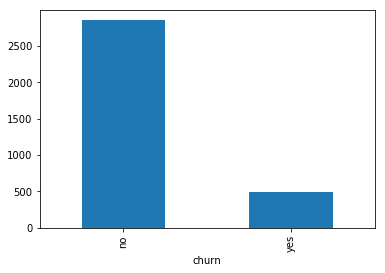

In [10]:
df_train.groupby('churn').size().plot(kind='bar')

### Funções auxiliares 

In [11]:
def distPlot(data, col, label):
    sns.distplot(data[col], rug=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Distribuição')
    plt.show()
   

In [12]:
def boxplot(data, col, label):
    sns.boxplot(data[col])
    plt.title(f'BoxPlot Variável:{label}')
    plt.xlabel(label)
    plt.ylabel('Medidas')
    plt.show()

In [13]:
def countPlot(data, col1, hue, labelx,labely,title):
   sns.set(style="darkgrid")
   sns.countplot(y=col, hue=hue, data=data)
   plt.title(title)
   plt.xlabel(labelx) 
   plt.ylabel(labely)
   plt.show()

In [14]:
def barPlotH(data, col1, col2, title, labelx, labely, cor):
   sns.set(style="darkgrid")
   sns.barplot(x = col1,y = col2, data=data, color=cor)
   plt.title(title, fontsize=18,color="black",alpha=2)
   plt.xlabel(labelx, size = 12,color="black")
   plt.ylabel(labely, size = 12,color="black")
   sns.despine(left=True, bottom=True)
   plt.show()


### Distribuição de cada variável individualmente 

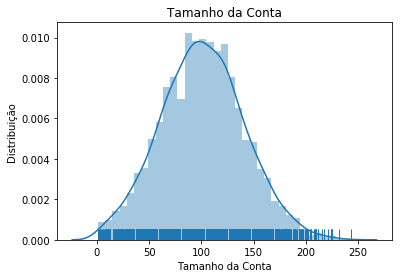

In [15]:
# Distribuição account_length

# Defino a colula
col = 'account_length'

# Defino o label
label= 'Tamanho da Conta'

# Plot 
distPlot(df_train,col,label)

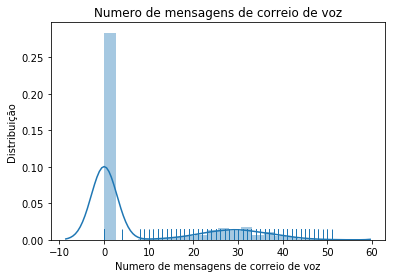

In [16]:
# Distribuição numero_vmail_mensagens

# Defino a colula
col = 'number_vmail_messages'

# Defino o label
label= 'Numero de mensagens de correio de voz'

# Plot 
distPlot(df_train,col,label)

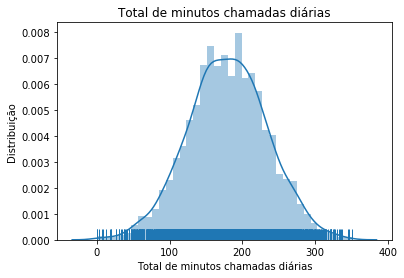

In [17]:
# Distribuição total_day_minutes

# Defino a colula
col = 'total_day_minutes'

# Defino o label
label= 'Total de minutos chamadas diárias'

# Plot 
distPlot(df_train,col,label)

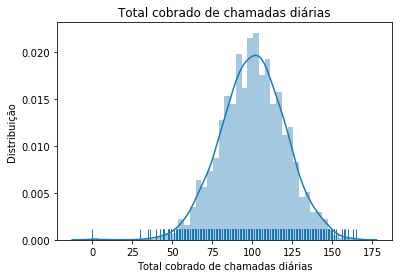

In [18]:
# Distribuição total_day_calls

# Defino a colula
col = 'total_day_calls'

# Defino o label
label= 'Total cobrado de chamadas diárias'

# Plot 
distPlot(df_train,col,label)

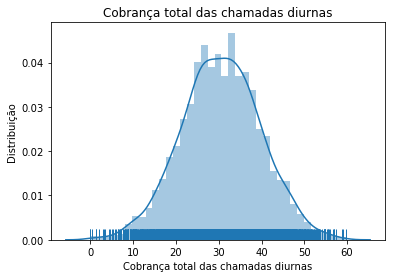

In [19]:
# Distribuição total_day_charge

# Defino a colula
col = 'total_day_charge'

# Defino o label
label= 'Cobrança total das chamadas diurnas'

# Plot 
distPlot(df_train,col,label)

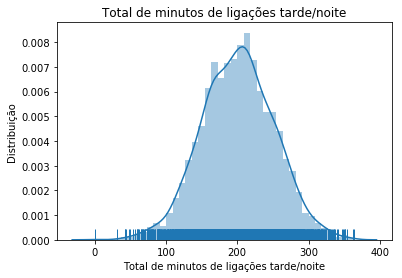

In [20]:
# Distribuição total_eve_minutes

# Defino a colula
col = 'total_eve_minutes'

# Defino o label
label= 'Total de minutos de ligações tarde/noite'

# Plot 
distPlot(df_train,col,label)

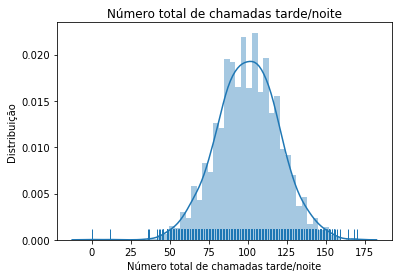

In [21]:
# Distribuição total_eve_calls

# Defino a colula
col = 'total_eve_calls'

# Defino o label
label= 'Número total de chamadas tarde/noite'

# Plot 
distPlot(df_train,col,label)

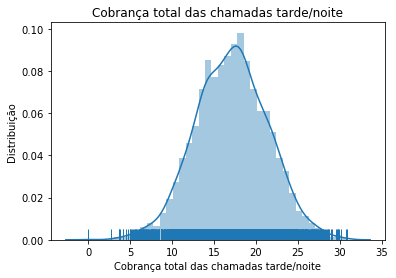

In [22]:
# Distribuição total_eve_charge

# Defino a colula
col = 'total_eve_charge'

# Defino o label
label= 'Cobrança total das chamadas tarde/noite'

# Plot 
distPlot(df_train,col,label)

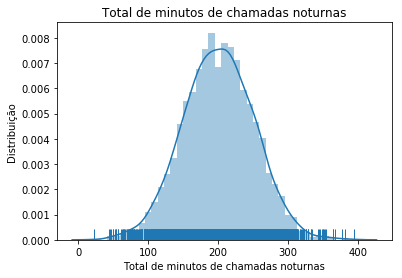

In [23]:
# Distribuição total_night_minutes

# Defino a colula
col = 'total_night_minutes'

# Defino o label
label= 'Total de minutos de chamadas noturnas'

# Plot 
distPlot(df_train,col,label)

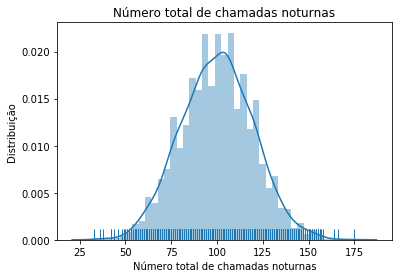

In [24]:
# Distribuição total_night_calls

# Defino a colula
col = 'total_night_calls'

# Defino o label
label= 'Número total de chamadas noturnas'

# Plot 
distPlot(df_train,col,label)

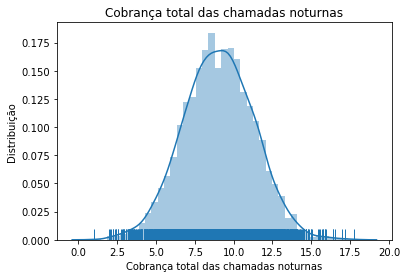

In [25]:
# Distribuição total_night_charge

# Defino a colula
col = 'total_night_charge'

# Defino o label
label= 'Cobrança total das chamadas noturnas'

# Plot 
distPlot(df_train,col,label)

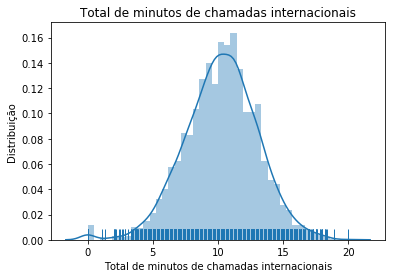

In [26]:
# Distribuição total_intl_minutes

# Defino a colula
col = 'total_intl_minutes'

# Defino o label
label= 'Total de minutos de chamadas internacionais'

# Plot 
distPlot(df_train,col,label)

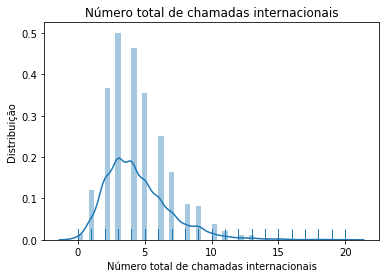

In [27]:
# Distribuição total_intl_calls

# Defino a colula
col = 'total_intl_calls'

# Defino o label
label= 'Número total de chamadas internacionais'

# Plot 
distPlot(df_train,col,label)

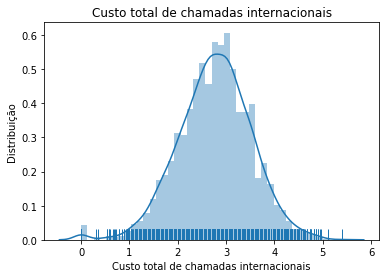

In [28]:
# Distribuição total_intl_charge

# Defino a colula
col = 'total_intl_charge'

# Defino o label
label= 'Custo total de chamadas internacionais'

# Plot 
distPlot(df_train,col,label)

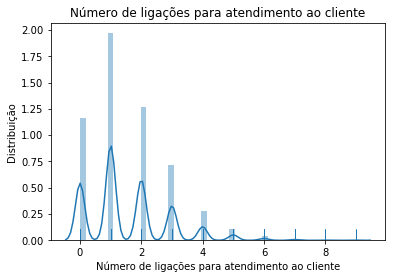

In [29]:
# Distribuição number_customer_service_calls

# Defino a colula
col = 'number_customer_service_calls'

# Defino o label
label= 'Número de ligações para atendimento ao cliente'

# Plot 
distPlot(df_train,col,label)

Podemos perceber que praticamento toda as variáveis numericas estão em uma distribuição normal, isso é interessante para a parte preditiva onde sera aplicado os modelos previsão.

### Contagem de clientes por estado separando por clientes fiéis e rotativos 

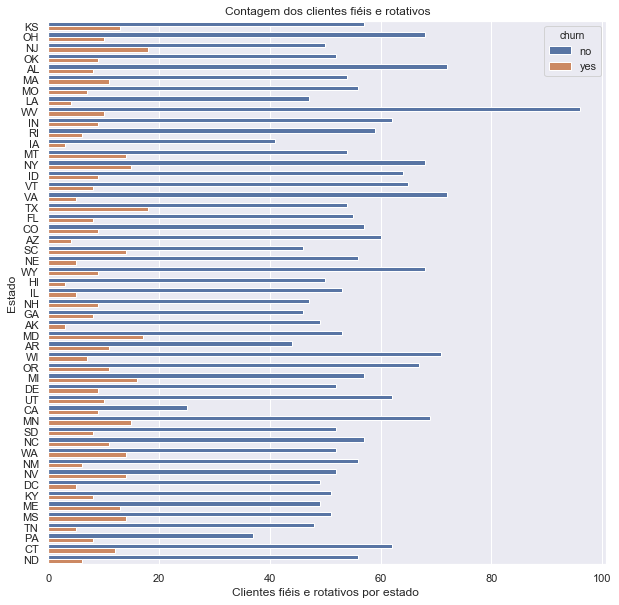

In [30]:
# Defino o eixo y para a contagem
col = 'state'
# Defino o hue 
hue = 'churn'
# Defino o titulo 
title = "Clientes fiéis e rotativos por estado "
# Defino o label y
labelx = 'Contagem dos clientes fiéis e rotativos'
# Defino o label x 
labely = 'Estado'
#plot
plt.figure(figsize = (10, 10))
countPlot(df_train, col, hue,title, labely, labelx)

Contagem de clientes por estado separando por clientes fiéis e rotativos tendo o estado WV em destaque na quantidade de clientes fiéis.

### Contagem de clientes por codigo da área separando por clientes fiéis e rotativos 

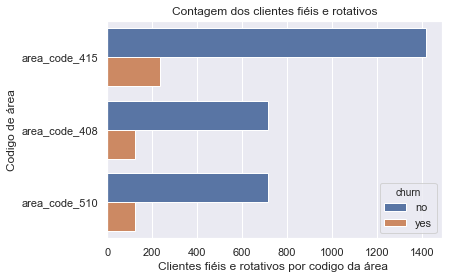

In [31]:
# Defino o eixo y para a contagem
col = 'area_code'
# Defino o hue 
hue = 'churn'
# Defino o titulo 
title = "Clientes fiéis e rotativos por codigo da área "
# Defino o label y
labelx = 'Contagem dos clientes fiéis e rotativos'
# Defino o label x 
labely = 'Codigo de área'
#plot
countPlot(df_train, col, hue,title, labely, labelx)

Área com código 415 tem o dobro da quantidade de clientes com relação as outras duas áreas.

### Contagem de clientes que possuem plano internacional ou não separando por clientes fiéis e rotativos 

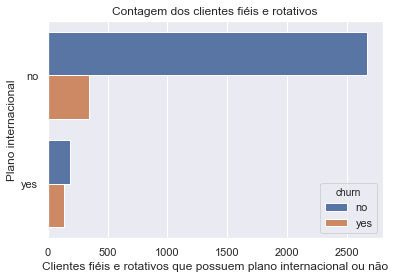

In [32]:
# Defino o eixo y para a contagem
col = 'international_plan'
# Defino o hue 
hue = 'churn'
# Defino o titulo 
title = "Clientes fiéis e rotativos que possuem plano internacional ou não"
# Defino o label y
labelx = 'Contagem dos clientes fiéis e rotativos'
# Defino o label x 
labely = 'Plano internacional'
#plot
countPlot(df_train, col, hue,title, labely, labelx)

Maioria dos clientes não possuem plano internacional, um dos fatores pode ser o valor a mais na mensalidade com relação a frequência de uso do cliente em ligações internacionais. 

### Contagem de clientes que possuem correio de voz ou não separando por clientes fiéis e rotativos 


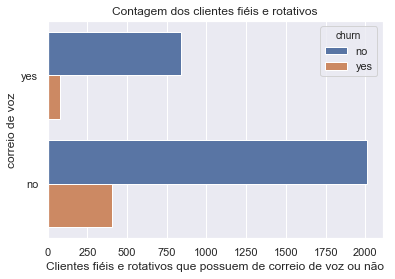

In [33]:
# Defino o eixo y para a contagem
col = 'voice_mail_plan'
# Defino o hue 
hue = 'churn'
# Defino o titulo 
title = "Clientes fiéis e rotativos que possuem de correio de voz ou não"
# Defino o label y
labelx = 'Contagem dos clientes fiéis e rotativos'
# Defino o label x 
labely = 'correio de voz'
#plot
countPlot(df_train, col, hue,title, labely, labelx)

Maioria dos clientes não possuem serviço de correio de voz

### Gráfico com os 15 Estados com maior tempo de Fidelidades.

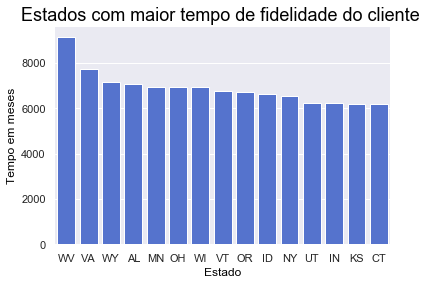

In [34]:
# Defino os valores para o data pegando só os clientes fiéis
data = df_train[df_train['churn']=='no'].groupby('state').account_length.sum().sort_values(ascending=False).head(15)
data = data.reset_index()
# Defino o eixo X 
col1 = 'state'
# Defino o eixo Y 
col2 = 'account_length'
# Defino o titulo 
title = "Estados com maior tempo de fidelidade do cliente "
# Defino o label y
labely = 'Tempo em meses'
# Defino o label x 
labelx = 'Estado'
# Defino a cor para as barras
cor = 'RoyalBlue'
#plot
barPlotH(data, col1, col2, title, labelx, labely,cor)

Grafico com os 15 estados com tempo maior de fidelidade, contagem feita em meses.

### 10 Estados com maior tempo de ligação, mais chamadas e maior valor cobrado, no período de uso da manhã

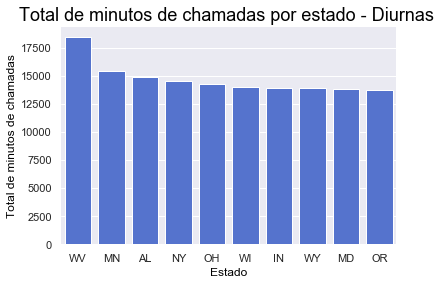

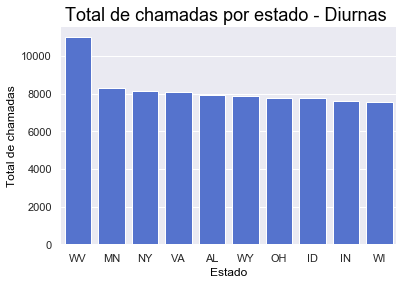

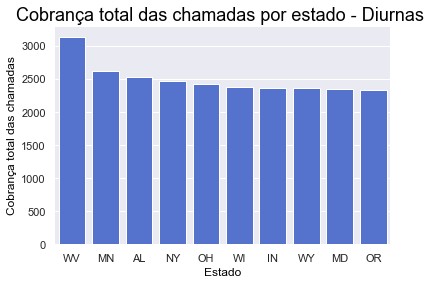

In [35]:
# Crios os 3 dados para o plot
data1 = df_train.groupby('state').total_day_minutes.sum().sort_values(ascending=False).head(10)
data1 = data1.reset_index()
data2 = df_train.groupby('state').total_day_calls.sum().sort_values(ascending=False).head(10)
data2 = data2.reset_index()
data3 = df_train.groupby('state').total_day_charge.sum().sort_values(ascending=False).head(10)
data3 = data3.reset_index()
# Defino o eixo X 
col1 = 'state'
# Defino os eixos Y 
y1 = 'total_day_minutes'
y2 = 'total_day_calls'
y3 = 'total_day_charge'
# Defino os titulos
t1 = "Total de minutos de chamadas por estado - Diurnas "
t2 = "Total de chamadas por estado - Diurnas "
t3 = "Cobrança total das chamadas por estado - Diurnas "
# Defino o label y
labely1 = 'Total de minutos de chamadas'
labely2 = 'Total de chamadas'
labely3 = 'Cobrança total das chamadas'
# Defino o label x 
labelx = 'Estado'
# Defino a cor para as barras
cor = 'RoyalBlue'
#plot
barPlotH(data1, col1, y1, t1, labelx, labely1, cor)
barPlotH(data2, col1, y2, t2, labelx, labely2, cor)
barPlotH(data3, col1, y3, t3, labelx, labely3, cor)


Temos os 10 estados com mais uso de minutos em chamadas, quantidade de chamadas feitas e valor cobrado contabilizando o período da manhã.
Percebe que nem sempre o tempo em minutos de ligação tem total relação com a quantidade de chamadas, alguns estados que estão no top 10 de quantidade de chamadas não estão no top 10 de minutos usados nas ligações nem na cobrança. Já como é de se esperar os 10  com mais minutos usados são os 10 com o maior valor cobrado. 


### 10 Estados com maior tempo de ligação, mais chamadas e maior valor cobrado, no período de uso da tarde

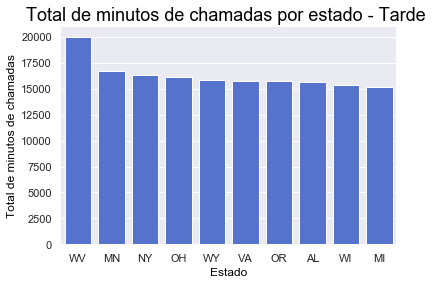

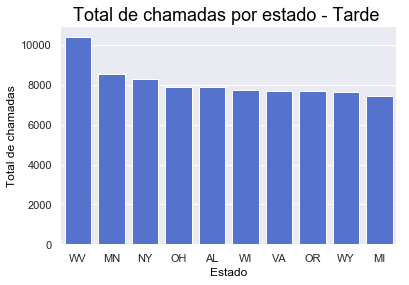

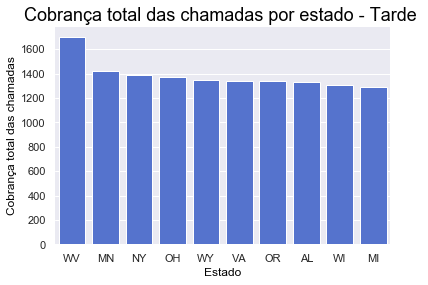

In [36]:
# Crios os 3 dados para o plot
data1 = df_train.groupby('state').total_eve_minutes.sum().sort_values(ascending=False).head(10)
data1 = data1.reset_index()
data2 = df_train.groupby('state').total_eve_calls.sum().sort_values(ascending=False).head(10)
data2 = data2.reset_index()
data3 = df_train.groupby('state').total_eve_charge.sum().sort_values(ascending=False).head(10)
data3 = data3.reset_index()
# Defino o eixo X 
col1 = 'state'
# Defino os eixos Y 
y1 = 'total_eve_minutes'
y2 = 'total_eve_calls'
y3 = 'total_eve_charge'
# Defino os titulos
t1 = "Total de minutos de chamadas por estado - Tarde "
t2 = "Total de chamadas por estado - Tarde "
t3 = "Cobrança total das chamadas por estado - Tarde "
# Defino o label y
labely1 = 'Total de minutos de chamadas'
labely2 = 'Total de chamadas'
labely3 = 'Cobrança total das chamadas'
# Defino o label x 
labelx = 'Estado'
# Defino a cor para as barras
cor = 'RoyalBlue'
#plot
barPlotH(data1, col1, y1, t1, labelx, labely1, cor)
barPlotH(data2, col1, y2, t2, labelx, labely2, cor)
barPlotH(data3, col1, y3, t3, labelx, labely3, cor)

Temos os 10 estados com mais uso de minutos em chamadas, quantidade de chamadas feitas e valor cobrado contabilizando o período da manhã.
Alguns estados que não estavam presentes no top 10 da manhã, já aparecem a tarde, indicando que nesses estados o uso começa a ser maior no período da tarde, tanto na quantidade de minutos usados quando na quantidade de chamadas e consequentemente na cobrança.


### 10 Estados com maior tempo de ligação, mais chamadas e maior valor cobrado, no período de uso da Noite.

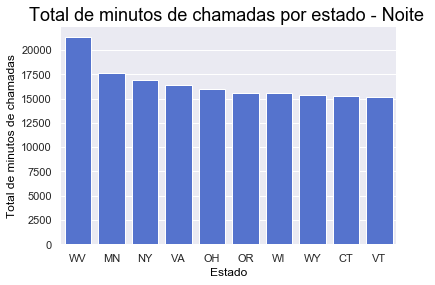

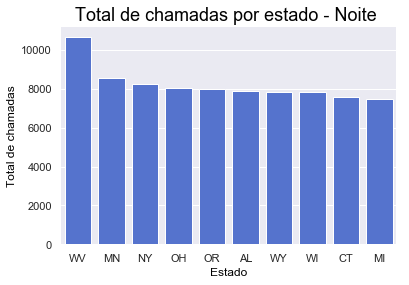

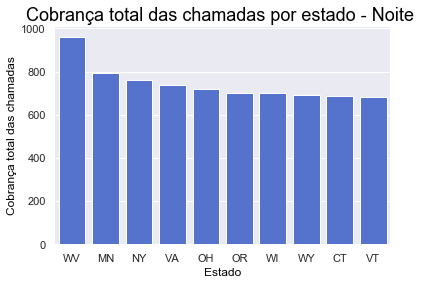

In [37]:
# Crios os 3 dados para o plot
data1 = df_train.groupby('state').total_night_minutes.sum().sort_values(ascending=False).head(10)
data1 = data1.reset_index()
data2 = df_train.groupby('state').total_night_calls.sum().sort_values(ascending=False).head(10)
data2 = data2.reset_index()
data3 = df_train.groupby('state').total_night_charge.sum().sort_values(ascending=False).head(10)
data3 = data3.reset_index()
# Defino o eixo X 
col1 = 'state'
# Defino os eixos Y 
y1 = 'total_night_minutes'
y2 = 'total_night_calls'
y3 = 'total_night_charge'
# Defino os titulos
t1 = "Total de minutos de chamadas por estado - Noite "
t2 = "Total de chamadas por estado - Noite "
t3 = "Cobrança total das chamadas por estado - Noite "
# Defino o label y
labely1 = 'Total de minutos de chamadas'
labely2 = 'Total de chamadas'
labely3 = 'Cobrança total das chamadas'
# Defino o label x 
labelx = 'Estado'
# Defino a cor para as barras
cor = 'RoyalBlue'
#plot
barPlotH(data1, col1, y1, t1, labelx, labely1, cor)
barPlotH(data2, col1, y2, t2, labelx, labely2, cor)
barPlotH(data3, col1, y3, t3, labelx, labely3, cor)

Temos os 10 estados com mais uso de minutos em chamadas, quantidade de chamadas feitas e valor cobrado contabilizando o período da noite.
A noite já temos alguns novos estados presentes que não aparecem nos períodos da manhã e noite.


### 10 Estados com maior tempo de ligação, mais chamadas e maior valor cobrado, para ligações internacionais.

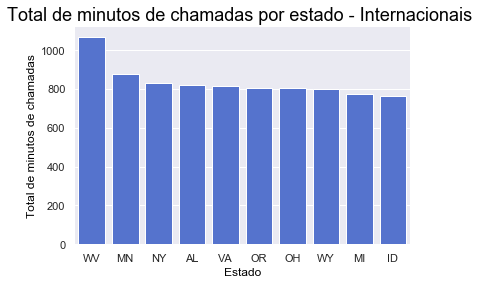

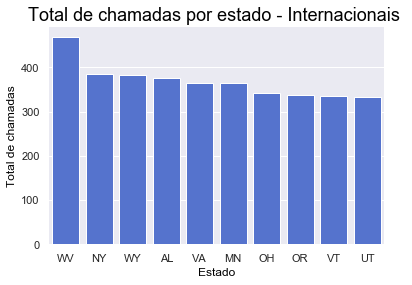

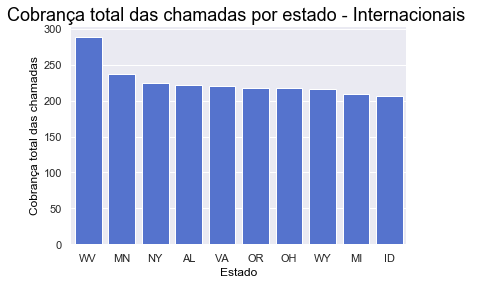

In [38]:
# Crios os 3 dados para o plot
data1 = df_train.groupby('state').total_intl_minutes.sum().sort_values(ascending=False).head(10)
data1 = data1.reset_index()
data2 = df_train.groupby('state').total_intl_calls.sum().sort_values(ascending=False).head(10)
data2 = data2.reset_index()
data3 = df_train.groupby('state').total_intl_charge.sum().sort_values(ascending=False).head(10)
data3 = data3.reset_index()
# Defino o eixo X 
col1 = 'state'
# Defino os eixos Y 
y1 = 'total_intl_minutes'
y2 = 'total_intl_calls'
y3 = 'total_intl_charge'
# Defino os titulos
t1 = "Total de minutos de chamadas por estado - Internacionais "
t2 = "Total de chamadas por estado - Internacionais "
t3 = "Cobrança total das chamadas por estado - Internacionais "
# Defino o label y
labely1 = 'Total de minutos de chamadas'
labely2 = 'Total de chamadas'
labely3 = 'Cobrança total das chamadas'
# Defino o label x 
labelx = 'Estado'
# Defino a cor para as barras
cor = 'RoyalBlue'
#plot
barPlotH(data1, col1, y1, t1, labelx, labely1, cor)
barPlotH(data2, col1, y2, t2, labelx, labely2, cor)
barPlotH(data3, col1, y3, t3, labelx, labely3, cor)

Temos os 10 estados com mais uso de minutos em chamadas, quantidade de chamadas feitas e valor cobrado contabilizando para ligações internacionais.
Em sua maioria os estados presentes nos gráficos dos horários estão no top 10 de uso internacional, porem temos alguns estados que não estão no top 10 relacionado aos horários, mas sim para ligações para fora. 


Embora exista um padrão no qual a maioria dos estados nos top 10 de cada estatística estarem presentes nos 3 horários e ligações internacionais, temos alguns que aparecem em especifico em cada um. 

A organização pode usar essas informações para criar pacotes especiais para esses estados ou até mesmo fazer um detalhamento mais especifico por estado, disponibilizado descontos para os clientes nos períodos que eles usam mais, assim como para ligações para fora, afim de criar uma espécie de bônus por uso e fidelizar ainda mais o cliente.


### Soma total recebido de cobrança por período e internacional.

[Text(0, 0.5, 'Cobrança total - Internacional'),
 Text(0.5, 0, 'Fiel - Rotativo')]

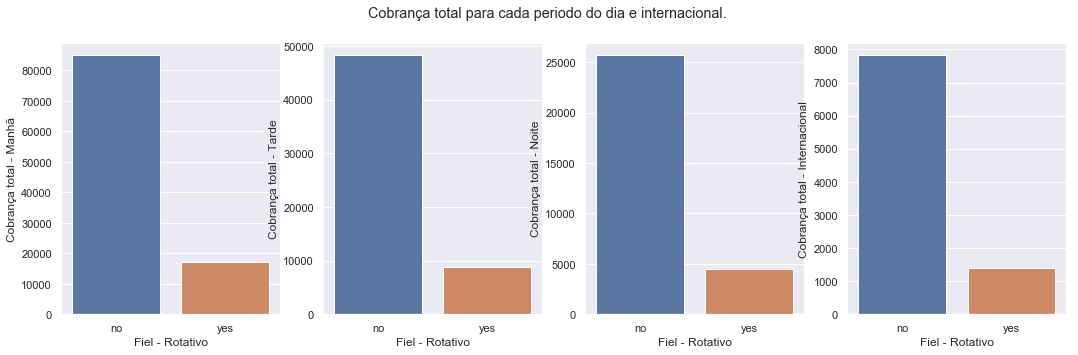

In [39]:
# Crio a figura e o eixo 1x4
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
# Defino o titulo geral 
fig.suptitle('Cobrança total para cada periodo do dia e internacional.')
# Defino os dados 
data = df_train.groupby('churn')[['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge']].sum()
data = data.reset_index()
#defino os plots
sns.barplot(ax=axes[0],x = 'churn',y = 'total_day_charge', data=data).set(xlabel='Fiel - Rotativo', ylabel = 'Cobrança total - Manhã')
sns.barplot(ax=axes[1],x = 'churn',y = 'total_eve_charge', data=data).set(xlabel='Fiel - Rotativo', ylabel = 'Cobrança total - Tarde')
sns.barplot(ax=axes[2],x = 'churn',y = 'total_night_charge', data=data).set(xlabel='Fiel - Rotativo', ylabel = 'Cobrança total - Noite')
sns.barplot(ax=axes[3],x = 'churn',y = 'total_intl_charge', data=data).set(xlabel='Fiel - Rotativo', ylabel = 'Cobrança total - Internacional')


Nesses gráficos podemos ver que o lucro com relação ao período cai pela metade a cada período, mostrando que ligações a noite e internacionais são as menos frequentes. Só o período da manhã tem um lucro praticamente igual se comparado com a soma dos outros 3 juntos. 

### Boxplots das variáveis numéricas

[Text(0.5, 0, 'Cobrança chamadas-Internacional')]

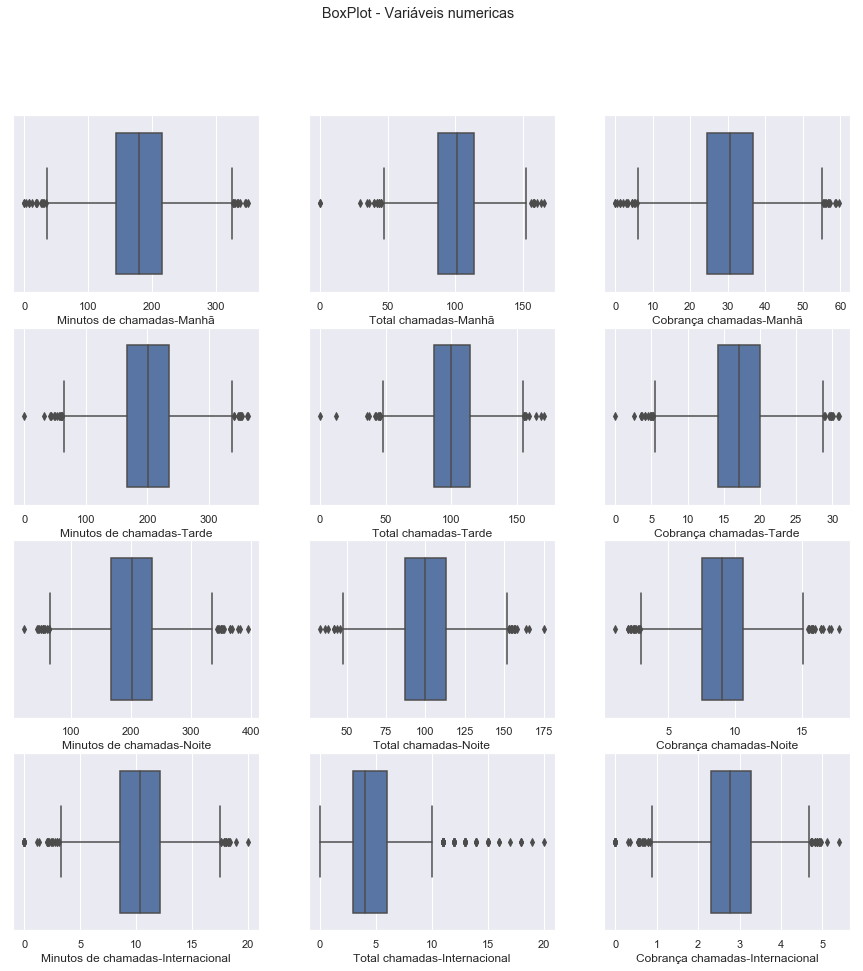

In [40]:
# Crio a figura e o eixo 4x3
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
# Defun o titulo Geral
fig.suptitle('BoxPlot - Variáveis numericas')
# Defuno cada plot nas posições e variáveis correta. 
sns.boxplot(ax=axes[0, 0], data=df_train, x='total_day_minutes').set(xlabel='Minutos de chamadas-Manhã')
sns.boxplot(ax=axes[0, 1], data=df_train, x='total_day_calls').set(xlabel='Total chamadas-Manhã')
sns.boxplot(ax=axes[0, 2], data=df_train, x='total_day_charge').set(xlabel='Cobrança chamadas-Manhã')
sns.boxplot(ax=axes[1, 0], data=df_train, x='total_eve_minutes').set(xlabel='Minutos de chamadas-Tarde')
sns.boxplot(ax=axes[1, 1], data=df_train, x='total_eve_calls').set(xlabel='Total chamadas-Tarde')
sns.boxplot(ax=axes[1, 2], data=df_train, x='total_eve_charge').set(xlabel='Cobrança chamadas-Tarde')
sns.boxplot(ax=axes[2, 0], data=df_train, x='total_night_minutes').set(xlabel='Minutos de chamadas-Noite')
sns.boxplot(ax=axes[2, 1], data=df_train, x='total_night_calls').set(xlabel='Total chamadas-Noite')
sns.boxplot(ax=axes[2, 2], data=df_train, x='total_night_charge').set(xlabel='Cobrança chamadas-Noite')
sns.boxplot(ax=axes[3, 0], data=df_train, x='total_intl_minutes').set(xlabel='Minutos de chamadas-Internacional')
sns.boxplot(ax=axes[3, 1], data=df_train, x='total_intl_calls').set(xlabel='Total chamadas-Internacional')
sns.boxplot(ax=axes[3, 2], data=df_train, x='total_intl_charge').set(xlabel='Cobrança chamadas-Internacional')

Com o gráfico BoxPlot podemos verificar as medidas de tendência central de cada varável, assim como seus outliers, e podemos notar que todas as variáveis possuem outliers.          

## Tratamento dos dados 

### Convertendo variável categórica para numérica 

In [89]:
# Para apresentar os dados para o algortimos temos que converter as variaveis object para int, pois ele espera receber numeros.

# Faço uma copia de cada DF antes da conversão. 
df_train_padrao = df_train.copy()
df_test_padrao = df_test.copy()
# Pegos as variáveis que são object e coloco em uma lista.
catval = df_train.dtypes == object
catval = df_train.columns[catval].tolist()
# crio o algortimo de conversão e aplico ja diretamente nas variáveis dos dados de treino e teste.  
le =LabelEncoder()
df_train[catval] = df_train[catval].apply(lambda col: le.fit_transform(col))
df_test[catval] = df_test[catval].apply(lambda col: le.fit_transform(col))


In [90]:
df_train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [91]:
df_test.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,11,101,2,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
2,26,137,2,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
3,35,103,0,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
4,32,99,1,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
5,40,108,1,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


### convertendo as variáveis faço um grafico de correlação.

In [92]:
df_train.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
state,1.0,0.0037,0.015,-0.0046,-0.032,-0.028,-0.0067,-0.00076,-0.0067,0.014,-0.016,0.014,0.025,0.0075,0.025,-0.0078,0.014,-0.0078,-0.026,0.0078
account_length,0.0037,1.0,-0.015,0.025,0.0029,-0.0046,0.0062,0.038,0.0062,-0.0068,0.019,-0.0067,-0.009,-0.013,-0.009,0.0095,0.021,0.0095,-0.0038,0.017
area_code,0.015,-0.015,1.0,0.044,0.0099,0.0091,0.01,-0.0071,0.01,0.00028,-0.0021,0.0003,0.0071,0.028,0.0071,0.0015,-0.0081,0.0014,0.028,0.0033
international_plan,-0.0046,0.025,0.044,1.0,0.006,0.0087,0.049,0.0038,0.049,0.019,0.0061,0.019,-0.029,0.012,-0.029,0.046,0.017,0.046,-0.025,0.26
voice_mail_plan,-0.032,0.0029,0.0099,0.006,1.0,0.96,-0.0017,-0.011,-0.0017,0.022,-0.0064,0.022,0.0061,0.016,0.0061,-0.0013,0.0076,-0.0013,-0.018,-0.1
number_vmail_messages,-0.028,-0.0046,0.0091,0.0087,0.96,1.0,0.00078,-0.0095,0.00078,0.018,-0.0059,0.018,0.0077,0.0071,0.0077,0.0029,0.014,0.0029,-0.013,-0.09
total_day_minutes,-0.0067,0.0062,0.01,0.049,-0.0017,0.00078,1.0,0.0068,1.0,0.007,0.016,0.007,0.0043,0.023,0.0043,-0.01,0.008,-0.01,-0.013,0.21
total_day_calls,-0.00076,0.038,-0.0071,0.0038,-0.011,-0.0095,0.0068,1.0,0.0068,-0.021,0.0065,-0.021,0.023,-0.02,0.023,0.022,0.0046,0.022,-0.019,0.018
total_day_charge,-0.0067,0.0062,0.01,0.049,-0.0017,0.00078,1.0,0.0068,1.0,0.007,0.016,0.007,0.0043,0.023,0.0043,-0.01,0.008,-0.01,-0.013,0.21
total_eve_minutes,0.014,-0.0068,0.00028,0.019,0.022,0.018,0.007,-0.021,0.007,1.0,-0.011,1.0,-0.013,0.0076,-0.013,-0.011,0.0025,-0.011,-0.013,0.093


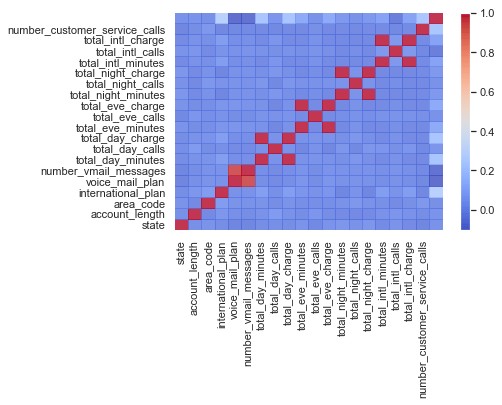

In [93]:
# Gráfico de correlação entre as variáveis preditoras 

# Pegos as variáveis preditoras
variaveis = df_train.columns[:-1]
# função do Plot de correlação.
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variaveis, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variaveis, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()
# Plot    
visualize_correlation_matrix(df_train)

Podemos ver nos dois gráficos que as colunas de total de charge e total minutos para qualquer horário tem uma alto correlação, como já era de se esperar, irei tirar as variáveis minutos, a princípio para testar os modelos para evitar problemas de falta de generalização

In [46]:
# Pego apenas as colunas desejadas 
colunas = ['state', 'account_length', 'area_code', 'international_plan',
        'number_vmail_messages','total_day_calls', 
        'total_day_charge','total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']
# Crio o novo dataset apenas com as colunas selecionadas. 
df_train = df_train.loc[:,colunas]

### Separo dos dados de treino e teste a variável target.

In [47]:
# Crio uma varável pra cada target
train_target = df_train['churn']
test_target = df_test['churn']

# Retiro a target para cada um deixando so as features
train_features =df_train.drop(labels = 'churn', axis = 1)
test_features =df_test.drop(labels = 'churn', axis = 1)


## Feature Selection


### Funções auxiliares

Criarei algumas funções auxiliares que nos ajudarão a normalizar os dados, selecionar as melhores variáveis e tecnica PCA

In [48]:
# Função para normalização e padronização de dados 

def dataNormalization(features, transform = None):
    
    if transform == 'MM':
        scaler = MinMaxScaler()
        rescaled_features = scaler.fit_transform(features)
        # DataFrame com os resultados.
        rescaled_featuresDF = pd.DataFrame(data = rescaled_features, columns = features.columns)
        # Caso precise voltar ao padrão use a função inverse_transform
        # scaler.inverse_transform(features)
        
    elif transform == 'N':
        scaler = Normalizer()
        rescaled_features = scaler.fit_transform(features)
        # DataFrame com os resultados.
        rescaled_featuresDF = pd.DataFrame(data = rescaled_features, columns = features.columns)
        
    elif transform == 'SS':
        scaler = StandardScaler()
        rescaled_features = scaler.fit_transform(features)
        # DataFrame com os resultados.
        rescaled_featuresDF = pd.DataFrame(data = rescaled_features, columns = features.columns)
        # Caso precise voltar ao padrão use a função inverse_transform
        # scaler.inverse_transform(features, copy=None)
        
    return rescaled_featuresDF

In [49]:
# Função para aplicar técnica  PCA

def pcaFeatures( features, n_components = None ):
    # Normalizando os dados
    scaler = MinMaxScaler(feature_range = (0, 1))
    FeatureMM = scaler.fit_transform(features)
    
    # Seleção de atributos
    pca = PCA(n_components)
    Feature_PCA = pca.fit_transform(FeatureMM)
    
    return Feature_PCA

In [50]:
# Função para seleção das melhores variáveis 

# KindSelection = None -> padrão para todos, função que determina qual sera o algortmo de seleção
# feature_number = None -> quantidade de variáveis com mais importancia. 
# columns = None -> Padrão para todos, deve criar uma variavel columns contendo os nomes das variaveis.
# score_func = None -> usado no Selectbest, como por exemplo chi2 
# n_estimators = None -> usado no RandomForestClassifier, por exemplo 200.
# random_state = usado no RandomForestClassifier.
# discrete_features = None -> usado no mutual_info_classif, exemplo 'auto'

def FeatureSelection (features, target,columns = None, KindSelection = None, score_func = None, feature_number = None, n_estimators = None,
                      random_state = None, discrete_features = None):
    
    # Usando o SelectKBest para seleção das variáveis 
    if KindSelection == 'SKB':
        best_var = SelectKBest(score_func, k = feature_number)
        features_SKB = best_var.fit_transform(features, target)
        Best_features = columns[best_var.get_support()]
    
    # Usando o ExtraTreesClassifier para seleção das variáveis
    elif KindSelection == 'ETC':
        best_var = ExtraTreesClassifier()
        features_ETC = best_var.fit(features, target)
        features_importance = pd.DataFrame(data = features_ETC.feature_importances_, index = columns, columns = ['Importance_Score'])
        Best_features = features_importance.sort_values(by = 'Importance_Score', ascending = False).head(feature_number)
     
    # Usando o RFE para seleção das variáveis
    elif KindSelection == 'RFE':
        modelo = LogisticRegression()
        best_var = RFE(modelo, feature_number)
        features_RFE = best_var.fit(features, target)
        Best_features=columns[[i for i in columns if i in features_RFE.support_]]
    
    # Usando o RandomForestClassifier para seleção das variáveis
    elif KindSelection == 'RFC':
        best_var = RandomForestClassifier(n_estimators = n_estimators,random_state = random_state)
        features_RFC = best_var.fit(features, target)
        predictF = features_RFC.predict(features)
        features_importance = pd.Series(data = features_RFC.feature_importances_, index = columns)
        Best_features_RFC = features_importance.nlargest(feature_number)
        Best_features = Best_features_RFC.index

    # Usando o mutual_info_classif para seleção das variáveis
    elif KindSelection == 'MIC':
        best_var = mutual_info_classif(features, target, discrete_features , n_neighbors = 3 )
        features_importance = pd.DataFrame(best_var, index = columns,  columns = ['Importance_Score'])
        Best_features = features_importance.sort_values(by='Importance_Score', ascending=False).head(feature_number)
        
    return Best_features

### Selecionando variáveis mais importantes em cada algortimo


#### Min Max Scaler

In [51]:
# Pego os nomes das colunas 
columns = train_features.columns

# Usando a função de normalização convertos os dados para a escala min max scaler
X_trainMM = dataNormalization(features = train_features , transform = 'MM')

# Seleção de variável com o SelectKBest
variaveis_SKB = FeatureSelection(features=X_trainMM, target=train_target, KindSelection ='SKB' , columns = columns, score_func = chi2, feature_number = 7, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o ExtraTreesClassifier
variaveis_ETC= FeatureSelection(features=X_trainMM, target=train_target, KindSelection ='ETC' , columns = columns, score_func = None, feature_number = 7, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o mutual_info_classif
variaveis_MIC= FeatureSelection(features=X_trainMM, target=train_target, KindSelection ='MIC' , columns = columns, score_func = None, feature_number = 7, n_estimators = None,
                      random_state = None, discrete_features = 'auto')

# Seleção de variável com o RandomForestClassifier
variaveis_RFC= FeatureSelection(features=X_trainMM, target=train_target, KindSelection ='RFC' , columns = columns, score_func = None, feature_number = 7, n_estimators = 200,
                      random_state = 0, discrete_features = None)

# Junto todas as variáves em uma série do pandas para filtrar no df geral. 
feature = pd.concat([pd.Series(variaveis_ETC.index),pd.Series(variaveis_SKB), pd.Series(variaveis_MIC.index), pd.Series(variaveis_RFC)],ignore_index=True)

# Trago todos as variáveis e passo em um list comprehension para criar um df com apenas as variáveis selecionadas. 
featuresMM_train = X_trainMM[[i for i in X_trainMM if i in feature.values]]

# Retiro possiveis colunas duplicadas
featuresMM_train = featuresMM_train.T.drop_duplicates().T

featuresMM_train.columns

Index(['international_plan', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')

### Normalizer 

In [52]:
# Pego os nomes das colunas 
columns = train_features.columns

# Usando a função de normalização convertos os dados para a escala min max scaler
X_trainN  = dataNormalization(features = train_features , transform = 'N')

# Seleção de variável com o SelectKBest
variaveis_SKB = FeatureSelection(features=X_trainN , target=train_target, KindSelection ='SKB' , columns = columns, score_func = chi2, feature_number = 8, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o ExtraTreesClassifier
variaveis_ETC= FeatureSelection(features=X_trainN , target=train_target, KindSelection ='ETC' , columns = columns, score_func = None, feature_number = 8, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o mutual_info_classif
variaveis_MIC= FeatureSelection(features=X_trainN , target=train_target, KindSelection ='MIC' , columns = columns, score_func = None, feature_number = 8, n_estimators = None,
                      random_state = None, discrete_features = 'auto')

# Seleção de variável com o RandomForestClassifier
variaveis_RFC= FeatureSelection(features=X_trainN , target=train_target, KindSelection ='RFC' , columns = columns, score_func = None, feature_number = 8, n_estimators = 200,
                      random_state = 0, discrete_features = None)

# Junto todas as variáves em uma série do pandas para filtrar no df geral. 
feature = pd.concat([pd.Series(variaveis_ETC.index),pd.Series(variaveis_SKB), pd.Series(variaveis_MIC.index), pd.Series(variaveis_RFC)],ignore_index=True)

# Trago todos as variáveis e passo em um list comprehension para criar um df com apenas as variáveis selecionadas. 
featuresN_train = X_trainN[[i for i in X_trainN if i in feature.values]]

# Retiro possiveis colunas duplicadas
featuresN_train  = featuresN_train.T.drop_duplicates().T

featuresN_train.columns

Index(['account_length', 'area_code', 'international_plan',
       'number_vmail_messages', 'total_day_calls', 'total_day_charge',
       'total_eve_calls', 'total_eve_charge', 'total_night_calls',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

### StandardScaler

In [53]:
# Pego os nomes das colunas 
columns = train_features.columns

# Usando a função de normalização convertos os dados para a escala min max scaler
X_trainSS   = dataNormalization(features = train_features , transform = 'SS')

# Seleção de variável com o SelectKBest
variaveis_SKB = FeatureSelection(features=X_trainSS  , target=train_target, KindSelection ='SKB' , columns = columns, score_func = f_classif, feature_number = 7, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o ExtraTreesClassifier
variaveis_ETC= FeatureSelection(features=X_trainSS  , target=train_target, KindSelection ='ETC' , columns = columns, score_func = None, feature_number = 7, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o mutual_info_classif
variaveis_MIC= FeatureSelection(features=X_trainSS  , target=train_target, KindSelection ='MIC' , columns = columns, score_func = None, feature_number = 7, n_estimators = None,
                      random_state = None, discrete_features = 'auto')

# Seleção de variável com o RandomForestClassifier
variaveis_RFC= FeatureSelection(features=X_trainSS  , target=train_target, KindSelection ='RFC' , columns = columns, score_func = None, feature_number = 7, n_estimators = 200,
                      random_state = 0, discrete_features = None)

# Junto todas as variáves em uma série do pandas para filtrar no df geral. 
feature = pd.concat([pd.Series(variaveis_ETC.index),pd.Series(variaveis_SKB), pd.Series(variaveis_MIC.index), pd.Series(variaveis_RFC)],ignore_index=True)

# Trago todos as variáveis e passo em um list comprehension para criar um df com apenas as variáveis selecionadas. 
featuresSS_train = X_trainSS[[i for i in X_trainSS if i in feature.values]]

# Retiro possiveis colunas duplicadas
featuresSS_train = featuresSS_train.T.drop_duplicates().T

featuresSS_train.columns

Index(['state', 'area_code', 'international_plan', 'number_vmail_messages',
       'total_day_charge', 'total_eve_charge', 'total_night_charge',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

### PCA

In [54]:
# Aplico a função PCA para os dados de treino e ja o de teste uma vez que vou usar todas as variáveis.
# Farei a divisão  em 4 componentes
featuresPCA_train = pcaFeatures(features=train_features, n_components=4)
featuresPCA_test = pcaFeatures(features=test_features, n_components=4)

### Salvo as variáveis selecionada por cada algortimo

In [55]:
featuresMM_train.to_csv('Dados/X_featureMM.csv',encoding='utf-8', index=None)
featuresN_train.to_csv('Dados/X_featureN.csv',encoding='utf-8', index=None)
featuresSS_train.to_csv('Dados/X_featureSS.csv',encoding='utf-8', index=None)
pd.DataFrame(featuresPCA_train).to_csv('Dados/X_featurePCA.csv',encoding='utf-8', index=None)

### Caso decida ja carregar as variaveis ja tratadas, descomente as linhas abaixo.

In [56]:
# Carregando as os data frame salvo anteriomente 
# featuresMM_train = pd.read_csv('Dados/X_featureMM.csv')
# featureN_train = pd.read_csv('Dados/X_featureN.csv')
# featureSS_train = pd.read_csv('Dados/X_featureSS.csv')
# featuresPCA_traindescomenta = pd.read_csv('Dados/X_featurePCA.csv')

## Análise preditiva dados treino

### Funções auxiliares

In [57]:
def classifiersAlgorithmsCVS(features, target):
    
    # Definindo os valores para o número de folds
    num_folds = 10
    
    # Preparando a lista de modelos
    modelos = []
    modelos.append(('LR', LogisticRegression()))
    modelos.append(('NB', GaussianNB()))
    modelos.append(('KNN', KNeighborsClassifier()))
    modelos.append(('CART', DecisionTreeClassifier()))
    modelos.append(('SVM', SVC()))
      
    # Avaliando cada modelo em um loop
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        kfold = KFold(n_splits = num_folds)
        cv_results = cross_val_score(modelo, features, target, cv = kfold, scoring = 'accuracy')
        resultados.append(cv_results)
        nomes.append(nome)
        msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
        print(msg)
    
    # Boxplot para comparar os algoritmos
    fig = plt.figure()
    fig.suptitle('Comparação de Algoritmos de Classificação')
    ax = fig.add_subplot(111)
    plt.boxplot(resultados)
    ax.set_xticklabels(nomes)
    plt.show()

In [61]:
def classifiersAlgorithmsEnsembleCVS(features, target):
    
    # Definindo os valores para o número de folds
    num_folds = 10
    
    # Preparando a lista de modelos
    modelos = []
    
    # Modelo RandomForestClassifier
    modelos.append(('RF', RandomForestClassifier()))
     # Modelo ExtraTreesClassifier
    modelos.append(('ETC', ExtraTreesClassifier()))
    # Modelo ExtremeGradientBoostingClassifier
    modelos.append(('XGBC',XGBClassifier(verbosity = 0,use_label_encoder=False)))
    # Modelo BaggingClassifier
    modelos.append(('BC', BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)))
    
    # Modelo Voting Classifier
    # coloco todos os modelos criados em uma lista para usar no algoritmo VotingClassifier
    estimators = []
    estimators.append(('KNN', KNeighborsClassifier()))
    estimators.append(('DTC', GaussianNB()))
    estimators.append(('RF', RandomForestClassifier()))
    estimators.append(('ETC', ExtraTreesClassifier()))
    estimators.append(('nn', MLPClassifier()))
    estimators.append(('NB', GaussianNB()))
    estimators.append(('LR', LogisticRegression()))

    # Crio o modelo
    modelos.append(('VC', VotingClassifier(estimators=estimators)))
    
    # Modelo com o StackingClassifier
    modelos.append(('SC',StackingClassifier(estimators=estimators)))
    
    # modelo com o AdaBoostClassifier
    modelos.append(('ABC', AdaBoostClassifier(base_estimator=RandomForestClassifier())))

  
    # Avaliando cada modelo em um loop
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        kfold = KFold(n_splits = num_folds)
        cv_results = cross_val_score(modelo, features, target, cv = kfold, scoring = 'accuracy')
        resultados.append(cv_results)
        nomes.append(nome)
        msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
        print(msg)
     
    # Boxplot para comparar os algoritmos
    fig = plt.figure()
    fig.suptitle('Comparação de Algoritmos de Classificação')
    ax = fig.add_subplot(111)
    plt.boxplot(resultados)
    ax.set_xticklabels(nomes)
    plt.show()

### Variáveis selecionadas com o Min Max Scaler

#### Algotitmos Individuais

LR: 0.859869 (0.024836)
NB: 0.846976 (0.012549)
KNN: 0.902486 (0.020256)
CART: 0.923791 (0.010514)
SVM: 0.909984 (0.018687)


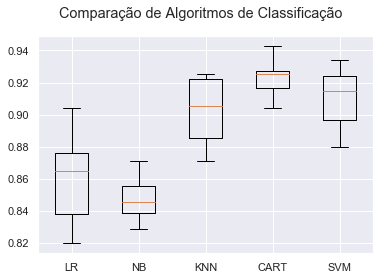

In [59]:
classifiersAlgorithmsCVS(features=featuresMM_train, target=train_target)

Dos algortimos individuais nos dados Min Max Scaler o de melhor desempenho foi o Cart.

#### Algotitmos Ensemble

RF: 0.951994 (0.010746)
ETC: 0.933687 (0.012445)
XGBC: 0.959195 (0.014963)
BC: 0.947492 (0.012409)
VC: 0.912085 (0.016905)
SC: 0.956497 (0.010759)
ABC: 0.952296 (0.014916)


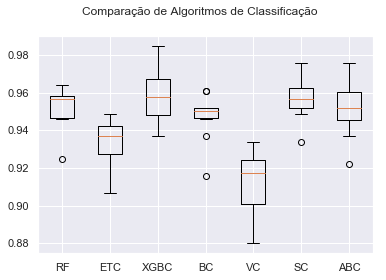

In [66]:
classifiersAlgorithmsEnsembleCVS(features=featuresMM_train, target=train_target)

Todos os algoritmos ensemble tiveram boa performance nos dados Min Max Scaler. 

### Variáveis selecionadas com o Normalizer

#### Algotitmos Individuais

LR: 0.855072 (0.026752)
NB: 0.846684 (0.014907)
KNN: 0.851774 (0.022019)
CART: 0.861383 (0.021104)
SVM: 0.855072 (0.026752)


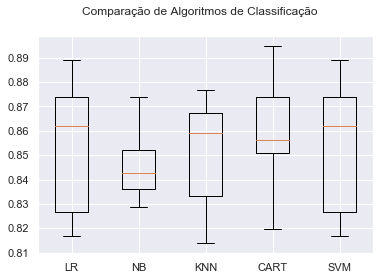

In [67]:
classifiersAlgorithmsCVS(features=featuresN_train, target=train_target)

Dos algortimos individuais nos dados Normalizer o de melhor desempenho foi o Cart

#### Algotitmos Ensemble

RF: 0.906387 (0.014219)
ETC: 0.894676 (0.021561)
XGBC: 0.919279 (0.019055)
BC: 0.905180 (0.015613)
VC: 0.886878 (0.018856)
SC: 0.910586 (0.012756)
ABC: 0.912084 (0.014319)


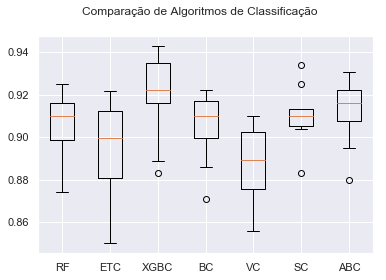

In [68]:
classifiersAlgorithmsEnsembleCVS(features=featuresN_train, target=train_target)

Todos os algoritmos ensemble tiveram uma performance um pouco inferior nos dados Normalizer. 

### Variáveis selecionadas com o StandardScaler

#### Algotitmos Individuais

LR: 0.860770 (0.020936)
NB: 0.847875 (0.012491)
KNN: 0.896180 (0.018069)
CART: 0.927991 (0.012315)
SVM: 0.929787 (0.017123)


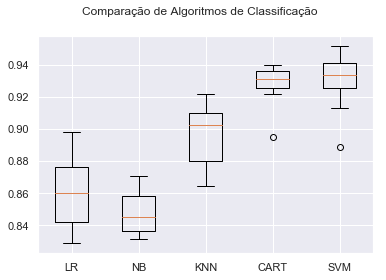

In [69]:
classifiersAlgorithmsCVS(features=featuresSS_train, target=train_target)

Dos algortimos individuais nos dados StandardScaler o de melhor desempenho foi o SVM

#### Algotitmos Ensemble

RF: 0.954998 (0.012515)
ETC: 0.934287 (0.011539)
XGBC: 0.958299 (0.013176)
BC: 0.951996 (0.015009)
VC: 0.918081 (0.016109)
SC: 0.958000 (0.013876)
ABC: 0.954399 (0.014984)


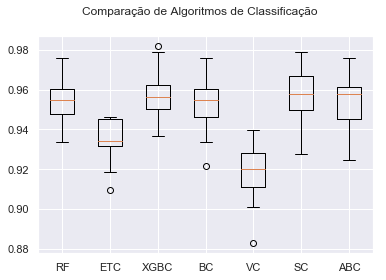

In [70]:
classifiersAlgorithmsEnsembleCVS(features=featuresSS_train, target=train_target)

Todos os algoritmos ensemble tiveram uma boa performance nos dados Standard Scaler assim como no Min Max Scaler. 

### Variáveis selecionadas com o PCA

#### Algotitmos Individuais

LR: 0.855072 (0.026752)
NB: 0.840373 (0.019520)
KNN: 0.839769 (0.024412)
CART: 0.793274 (0.019194)
SVM: 0.851469 (0.029527)


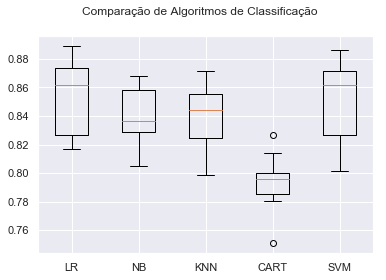

In [71]:
classifiersAlgorithmsCVS(features=featuresPCA_train, target=train_target)

Dos algortimos individuais nos dados PCA o de melhor desempenho foi o LR

#### Algotitmos Ensemble

RF: 0.844569 (0.023758)
ETC: 0.840672 (0.023308)
XGBC: 0.836472 (0.022098)
BC: 0.849370 (0.026277)
VC: 0.849671 (0.026770)
SC: 0.850869 (0.030364)
ABC: 0.841869 (0.025385)


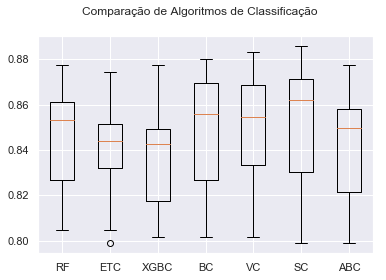

In [72]:
classifiersAlgorithmsEnsembleCVS(features=featuresPCA_train, target=train_target)

Todos os algoritmos ensemble ficaram um pouco abaixo com relação aos dados em outras escalas, logo o PCA não seria muito indicado para esse projeto.  

## Analise preditiva dados teste

### Preparação dos dados de teste para receber o algortimo

In [74]:
# Primeiro faço um filtro criando um data set novo com apenas as variáveis selecionadas para cada scala.
featuresSS_test = test_features[[i for i in test_features if i in featuresSS_train.columns]]
featuresN_test = test_features[[i for i in test_features if i in featuresN_train.columns]]

# Aplico a escala correta para cada um.
featuresSS_test =dataNormalization(features = featuresSS_test , transform = 'SS')
featuresN_test =dataNormalization(features = featuresN_test , transform = 'N')

### Criação dos  modelos com melhores desempenho e aplico algumas otmizações.

Como vimos todos os modelos Ensemble tiveram uma boa performance nos dados Min Max Scaler e Standard Scaler, irei escolher o RandomForest e o StackingClassifier para esse projeto, e farei umas otimizações buscando uma melhora se possível. 

#### RandomForestClassifier

Usarei os dados StandardScaler para  RandomForestClassifier.

In [75]:
# Crio o grip para os testes de Otmização 
param_grid = dict (
    n_estimators      = [100, 105, 110, 115], 
    max_depth         = [None, 2, 4, 6,10],
    max_features      = ['auto', 'sqrt', 'log2'], 
    min_samples_split = [2, 4, 5, 8, 9,11],
    min_samples_leaf  = [1, 2, 3,5]
)


# Crio o modelo 
modeloRC = RandomForestClassifier()

# Buscando os melhores paramentros.
gridRC = GridSearchCV(estimator = modeloRC, param_grid = param_grid, cv = 5, verbose = 3, n_jobs = -1)

# Rodando o algoritmo nos dados treino
gridRC.fit(featuresSS_train,train_target)

# Imprimo o que o algortimo selecionou como melhores paramentros.
print(f'Melhores Paramentros para o modelo RF: {gridRC.best_estimator_}')

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Melhores Paramentros para o modelo RF: RandomForestClassifier(min_samples_split=4)


In [76]:
# Crio o modelo com os parametros encontrados 
modeloRC = RandomForestClassifier(n_estimators = 115, 
                                  max_features='sqrt',
                                  min_samples_leaf=6,
                                  min_samples_split = 4,
                                  max_depth= None)

# Treino o modelo com os dados de treino
modeloRC.fit(featuresSS_train,train_target)

# Faço a previsão dos dados de treino
previsao_treino = modeloRC.predict(featuresSS_train)

# Imprimo a acurácia da previsão
acuracia = accuracy_score(train_target,previsao_treino)
print(f'Acurácia nos dados de treino de: {acuracia:.2f}%')

# Avaliando Recall com o classification Report 
print( classification_report(train_target, previsao_treino))
        
# Matriz de confusão do modelo 
print(pd.crosstab(train_target, previsao_treino, rownames=['Real'], colnames=['Previsto'], margins=True))
print('\n')

Acurácia nos dados de treino de: 0.97%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2850
           1       1.00      0.82      0.90       483

    accuracy                           0.97      3333
   macro avg       0.98      0.91      0.94      3333
weighted avg       0.97      0.97      0.97      3333

Previsto     0    1   All
Real                     
0         2849    1  2850
1           89  394   483
All       2938  395  3333




Com a Otimização tivemos uma melhora no desempenho de 95% para 97% nos dados de treino

In [77]:
# Agora faço as previsões nos dados de teste

# Faço a previsão dos dados de teste
previsao_test = modeloRC.predict(featuresSS_test)

# Imprimo a acurácia da previsão
acuracia = accuracy_score(test_target,previsao_test)
print(f'Acurácia nos dados de treino de: {acuracia:.2f}%')

# Avaliando Recall com o classification Report 
print(classification_report(test_target, previsao_test))
        
# Matriz de confusão do modelo 
print(pd.crosstab(test_target, previsao_test, rownames=['Real'], colnames=['Previsto'], margins=True))
print('\n')

Acurácia nos dados de treino de: 0.96%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1443
           1       0.97      0.69      0.80       224

    accuracy                           0.96      1667
   macro avg       0.96      0.84      0.89      1667
weighted avg       0.96      0.96      0.95      1667

Previsto     0    1   All
Real                     
0         1438    5  1443
1           70  154   224
All       1508  159  1667




Nos dados de teste tivemos um acuracia de 96% nas previsões. Excelente! 

#### StackingClassifier 

Usarei os dados StandardScaler e Normalizer que tiveram o melhor desempenho para  StackingClassifier.

In [78]:
# Otimizo alguns modelos usados StackingClassifier 

# Modelo SVM
# Crio o grip para os testes de Otmização 
param_grid = {'C': [0.1, 1, 10,100], 'gamma': [1,0.1,0.01,],'kernel': ['rbf', 'poly']}
# Buscando os melhores paramentros 
gridSVM = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
# Rodando o algoritmo nos dados treino
gridSVM.fit(featuresN_train,train_target)
# Imprimo o que o algortimo selecionou como melhores paramentros.
print(f'Melhores Paramentros para o modelo RF: {gridSVM.best_estimator_}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .......................C=0.1, gamma=0.

[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ...................

#### Dados Normalizer 

In [80]:
# Crio o modelo SVM com os melhores parametros 
modeloSVM = SVC(C=0.1, gamma=1,kernel = 'poly')

# Crio o modelo colocando o modelo otimizado do RF 
estimators = []
estimators.append(('KNN', KNeighborsClassifier()))
estimators.append(('DTC', GaussianNB()))
estimators.append(('RF', modeloRC))
estimators.append(('nn', MLPClassifier()))
estimators.append(('NB', GaussianNB()))
estimators.append(('SVM', modeloSVM))
# Modelo com o StackingClassifier
modeloSC = StackingClassifier(estimators=estimators) 

# Treino o modelo com os dados de treino
modeloSC.fit(featuresN_train,train_target)

# Faço a previsão dos dados de treino
previsao_treino = modeloSC.predict(featuresN_train)

# Imprimo a acurácia da previsão
acuracia = accuracy_score(train_target,previsao_treino)
print(f'Acurácia nos dados de treino de: {acuracia:.2f}%')

# Avaliando Recall com o classification Report 
print( classification_report(train_target, previsao_treino))
        
# Matriz de confusão do modelo 
print(pd.crosstab(train_target, previsao_treino, rownames=['Real'], colnames=['Previsto'], margins=True))
print('\n')

Acurácia nos dados de treino de: 0.95%
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.93      0.73      0.82       483

    accuracy                           0.95      3333
   macro avg       0.95      0.86      0.90      3333
weighted avg       0.95      0.95      0.95      3333

Previsto     0    1   All
Real                     
0         2825   25  2850
1          128  355   483
All       2953  380  3333




Nos dados de treino normalizer não tivemos melhora aparente, se mantendo nos 95%

In [81]:
# Agora faço as previsões nos dados de teste

# Faço a previsão dos dados de teste
previsao_test = modeloSC.predict(featuresN_test)

# Imprimo a acurácia da previsão
acuracia = accuracy_score(test_target,previsao_test)
print(f'Acurácia nos dados de treino de: {acuracia:.2f}%')

# Avaliando Recall com o classification Report 
print( classification_report(test_target, previsao_test))
        
# Matriz de confusão do modelo 
print(pd.crosstab(test_target, previsao_test, rownames=['Real'], colnames=['Previsto'], margins=True))
print('\n')

Acurácia nos dados de treino de: 0.92%
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1443
           1       0.75      0.57      0.64       224

    accuracy                           0.92      1667
   macro avg       0.84      0.77      0.80      1667
weighted avg       0.91      0.92      0.91      1667

Previsto     0    1   All
Real                     
0         1400   43  1443
1           97  127   224
All       1497  170  1667




Nos dados de teste o modelo teve um acurácia de 92%. 

#### Dados StandardScaler

In [83]:
# Crio o modelo SVM com os melhores parametros 
modeloSVM = SVC(C=0.1, gamma=1,kernel = 'poly')

# Crio o modelo colocando o modelo otimizado do RF 
estimators = []
estimators.append(('KNN', KNeighborsClassifier()))
estimators.append(('DTC', GaussianNB()))
estimators.append(('RF', modeloRC))
estimators.append(('nn', MLPClassifier()))
estimators.append(('NB', GaussianNB()))
estimators.append(('SVM', modeloSVM))
# Modelo com o StackingClassifier
modeloSC = StackingClassifier(estimators=estimators) 

# Treino o modelo com os dados de treino
modeloSC.fit(featuresSS_train,train_target)

# Faço a previsão dos dados de treino
previsao_treino = modeloSC.predict(featuresSS_train)

# Imprimo a acurácia da previsão
acuracia = accuracy_score(train_target,previsao_treino)
print(f'Acurácia nos dados de treino de: {acuracia:.2f}%')

# Avaliando Recall com o classification Report 
print( classification_report(train_target, previsao_treino))
        
# Matriz de confusão do modelo 
print(pd.crosstab(train_target, previsao_treino, rownames=['Real'], colnames=['Previsto'], margins=True))
print('\n')

Acurácia nos dados de treino de: 0.98%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2850
           1       0.99      0.86      0.92       483

    accuracy                           0.98      3333
   macro avg       0.98      0.93      0.95      3333
weighted avg       0.98      0.98      0.98      3333

Previsto     0    1   All
Real                     
0         2845    5  2850
1           70  413   483
All       2915  418  3333




Com os dados StandardScaler tivemos uma melhora otimizando o algoritmo chegando a 98% de acurácia nos dados de treino

In [84]:
# Agora faço as previsões nos dados de teste

# Faço a previsão dos dados de teste
previsao_test = modeloSC.predict(featuresSS_test)

# Imprimo a acurácia da previsão
acuracia = accuracy_score(test_target,previsao_test)
print(f'Acurácia nos dados de treino de: {acuracia:.2f}%')

# Avaliando Recall com o classification Report 
print( classification_report(test_target, previsao_test))
        
# Matriz de confusão do modelo 
print(pd.crosstab(test_target, previsao_test, rownames=['Real'], colnames=['Previsto'], margins=True))
print('\n')

Acurácia nos dados de treino de: 0.96%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1443
           1       0.91      0.77      0.84       224

    accuracy                           0.96      1667
   macro avg       0.94      0.88      0.91      1667
weighted avg       0.96      0.96      0.96      1667

Previsto     0    1   All
Real                     
0         1426   17  1443
1           51  173   224
All       1477  190  1667




O algoritmo chegou a uma acurácia de 96% exatamente igual ao RandomForest para esses dados. 

## Considerações Finais 

Como podemos constatar tanto os modelos RandomForest quanto o StackingClassifier tiveram um aproveitamento excelente nos dados novos, considerando a normalização Standard Scaler, é possível que outros modelos ensemble testados nesse projeto possam também atingir essa acurácia ou até mesmo melhor em uma otimização, porem eu decidi escolher os dois acima.

O Customer Churn da empresa para os dados de treino foi de 15% arredondado  

O Customer Churn da empresa para os dados de test foi de 14% arredondado 

O Customer Churn da empresa para os dados previstos pelo modelo StackingClassifier foi de 11% arredondado, considerando que o teste foi de 14% e sempre tem a margem de erro das previsões, o modelo fez um bom trabalho, considerando que 11% dos clientes nesses dados tende a cancelar o contrato.

## Obrigado! Entre em contato comigo acessando meu portifolio (https://campos1989.github.io/) no menu contato!